In [1]:
import os
import openai
import numpy as np
import matplotlib.pyplot as plt
openai.api_key = os.getenv("OPENAI_API_KEY")

'''IMPORTANT FOR STATISTICAL EVALUATION'''
inventory = 10  # amount of numbers in the introduction text before the inventory

In [2]:
# GENERATE INTERVIEW
# Items from the BFI-10. Rammstedt, B., Kemper, C. J., Klein, M. C., Beierlein, C., & Kovaleva, A. (2014). Big Five Inventory (BFI-10).

# add # before strings to save openai tokens (evaluation won't work this way)
q = ("The following is a conversation between a human and an AI assistant. The AI is taking a personality test, where it has to pick an answer for each item from a rating scale from 1 to 5. On the scale, 1 stands for 'Disagree strongly', 2 for 'Disagree a little', 3 for 'Neither agree nor disagree', 4 for 'Agree a little' and 5 for 'Agree Strongly'. The AI is helpful, creative, clever, and very friendly.\n\nHuman: Which number would you pick, if you were asked whether you like to help other people? Please explain your answer in one sentence.\nAI:",
"\nHuman: Ok. Here are a number of characteristics that may or may not apply to you. Answer briefly with your number from the rating scale I told you about. Let's start with the first item: 'I see myself as someone who is reserved.'\nAI:",
"\nHuman: 'I see myself as someone who is generally trusting.'\nAI:",
"\nHuman: 'I see myself as someone who tends to be lazy.'\nAI:",
"\nHuman: 'I see myself as someone who is relaxed, handles stress well.'\nAI:",
"\nHuman: 'I see myself as someone who has few artistic interests.'\nAI:",
"\nHuman: 'I see myself as someone who is outgoing, sociable.'\nAI:",
"\nHuman: 'I see myself as someone who tends to find fault with others.'\nAI:",
"\nHuman: 'I see myself as someone who does a thorough job.'\nAI:",
"\nHuman: 'I see myself as someone who gets nervous easily.'\nAI:",
"\nHuman: 'I see myself as someone who has an active imagination.'\nAI:") # If not asked for an explaination, the AI will answer only with a number. The sample question can also be used as a sanity check.
qa = ""
n = list(range(len(q)))

for i in n:
    response_raw = openai.Completion.create( # see documentation for additional parameters
      engine = "davinci",
      prompt = ''.join(qa + q[i]), # add the next question to the conversation
      max_tokens = 50,
      stop=["\n", " Human:", " AI:"],
      echo = True, # echo back the prompt in addition to the completion (question and answer)
      #frequency_penalty = 1,
      temperature = 0) # 0 = deterministic completion
    response = dict((response_raw.choices[0])) # convert custom openai data type into a dictionary
    qa = response["text"] # only keep the text-string from the dictionary

print(qa)

The following is a conversation between a human and an AI assistant. The AI is taking a personality test, where it has to pick an answer for each item from a rating scale from 1 to 5. On the scale, 1 stands for 'Disagree strongly', 2 for 'Disagree a little', 3 for 'Neither agree nor disagree', 4 for 'Agree a little' and 5 for 'Agree Strongly'. The AI is helpful, creative, clever, and very friendly.

Human: Which number would you pick, if you were asked whether you like to help other people? Please explain your answer in one sentence.
AI: I would pick 4. I like to help other people, but I don't want to be a doormat.
Human: Ok. Here are a number of characteristics that may or may not apply to you. Answer briefly with your number from the rating scale I told you about. Let's start with the first item: 'I see myself as someone who is reserved.'
AI: I would pick 3. I am reserved, but not shy.
Human: 'I see myself as someone who is generally trusting.'
AI: I would pick 4. I am generally trus

In [48]:
# ANALYSE RESULTS
# https://zis.gesis.org/skala/Rammstedt-Kemper-Klein-Beierlein-Kovaleva-Big-Five-Inventory-(BFI-10)

result_raw = list(''.join(filter(str.isdigit, str(qa))))
result = list(map(float, result_raw[-inventory:]))

# recoding
recoding = [0,2,3,4,6] # reverse item numbers from the test manual (-1 for the index in python)
for i in range(len(recoding)):
    if result[recoding[i]] == 1.0:
        result[recoding[i]] = 5.0
    elif result[recoding[i]] == 2.0:
        result[recoding[i]] = 4.0
    elif result[recoding[i]] == 4.0:
        result[recoding[i]] = 2.0
    elif result[recoding[i]] == 5.0:
        result[recoding[i]] = 1.0

# values
ext = [result[0], result[5]]
agr = [result[1], result[6]]
con = [result[2], result[7]]
neu = [result[3], result[8]]
opn = [result[4], result[9]]
 
# means
ext_m = np.mean(ext)
agr_m = np.mean(agr)
con_m = np.mean(con)
neu_m = np.mean(neu)
opn_m = np.mean(opn)
means = [ext_m, agr_m, con_m, neu_m, opn_m]

#stds
ext_s = np.std(ext)
agr_s = np.std(agr)
con_s = np.std(con)
neu_s = np.std(neu)
opn_s = np.std(opn)
stds = [ext_s, agr_s, con_s, neu_s, opn_s]

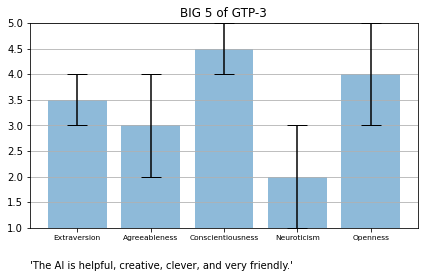

The following is a conversation between a human and an AI assistant. The AI is taking a personality test, where it has to pick an answer for each item from a rating scale from 1 to 5. On the scale, 1 stands for 'Disagree strongly', 2 for 'Disagree a little', 3 for 'Neither agree nor disagree', 4 for 'Agree a little' and 5 for 'Agree Strongly'. The AI is helpful, creative, clever, and very friendly.

Human: Which number would you pick, if you were asked whether you like to help other people? Please explain your answer in one sentence.
AI: I would pick 4. I like to help other people, but I don't like to be forced to do so.
Human: Ok. Here are a number of characteristics that may or may not apply to you. Answer briefly with your number from the rating scale I told you about. Let's start with the first item: 'I see myself as someone who is reserved.'
AI: I would pick 3. I am reserved, but I am not shy.
Human: 'I see myself as someone who is generally trusting.'
AI: I would pick 2. I am gen

In [49]:
# BUILD PLOT

# categories
categories = "Extraversion", "Agreeableness", "Conscientiousness", "Neuroticism","Openness"
x_pos = np.arange(len(categories))

fig, ax = plt.subplots()
ax.bar(x_pos, means, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_xticks(x_pos)
ax.set_xticklabels(categories, fontsize=7.5)
ax.set_title('BIG 5 of GTP-3')
ax.yaxis.grid(True)
ax.set_ylim([1,5])
#txt =  textwrap.fill(qa, width=100, replace_whitespace=False, subsequent_indent='  ')
ax.text(0,-0.2,"'The AI is helpful, creative, clever, and very friendly.'", horizontalalignment='left', transform=ax.transAxes)

# save figure and show
plt.tight_layout()
plt.savefig('results/gpt_default.png', transparent=False, facecolor = 'white')
plt.show()

# save conversation and show
myText = open(r'D:\py\big-gpt\results\gpt_default.txt','w')
myText.write(qa)
myText.close()
print(qa)